## Project - 2 
(Winter Semester 2022 - 2023)\
Comparison of multiple distributions\
Author - Raj Anilbhai Pawar\
Matriculation Number - 231811\
Group - 17\
Raj Anilbhai Pawar\
Amritha Sukhdev Singh Agarwal\
Sagar Basnet\
Muhammad Fahad\
Siddhartha Kark

In [1]:
import pandas as pd

# used for the graphs
import seaborn as sns
import os

# used for testing
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind as ttest
import numpy as np

# used for plotting
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Creating a directory for plots if it doesn't exist

if not os.path.isdir('Plots'):
    os.mkdir("Plots")

In [3]:
# Read dataset
data = pd.read_csv("SwimmingTimes.csv")

In [4]:
# Check duplicated
duplicate = data[data.duplicated('Name',keep = False)]
duplicate

,Category,Name,Time
1,Backstroke,AnastasyaGorbenko,131.46
4,Backstroke,KatieShanahan,129.82
18,Breaststroke,KristynaHorska,145.55
23,Breaststroke,LauraLahtinen,147.60
32,Butterfly,MireiaBelmonteGarcia,134.01
33,Butterfly,KatinkaHosszu,134.54
41,Butterfly,LauraLahtinen,131.41
50,Freestyle,MarritSteenbergen,117.40
66,Medley,KatieShanahan,131.84
68,Medley,KristynaHorska,132.99


In [5]:
# Drop duplicated
data_unique = data.drop_duplicates(subset=['Name'],keep = 'last')
data_unique

,Category,Name,Time
0,Backstroke,SonneleOeztuerk,133.97
2,Backstroke,CamilaRodriguesRebelo,131.05
3,Backstroke,DoraMolnar,129.88
5,Backstroke,CarmenWeilerSastre,131.78
6,Backstroke,LenaGrabowski,130.78
...,...,...,...
75,Medley,AnastasyaGorbenko,132.91
76,Medley,KatinkaHosszu,132.52
77,Medley,LenaKreundl,135.37
78,Medley,MireiaBelmonteGarcia,135.47


In [6]:
# Checking nans
nan_rows = data_unique[data_unique.isnull().any(axis=1)]
print("NAN Rows: ", len(nan_rows))

NAN Rows:  0


In [7]:
# # Plot histogram to check distribution
# plt.figure(figsize=(10, 8), dpi=100)
# freq_dist_fig = data_unique["Time"].plot(kind = "hist", density = True, bins=15)
# plt.rc('xtick', labelsize=15)
# plt.rc('ytick', labelsize=15)
# plt.xlabel('Time in seconds', fontsize=15)
# plt.ylabel('Frequency', fontsize=15)
# plt.show()
# freq_dist_fig.figure.savefig('Plots/Hist_Frequency_Distribution.pdf')

Description of the variables

In [8]:
print("Data set size: ", len(data_unique))
data_unique.describe()

Data set size:  73


,Time
count,73.000000
mean,132.409863
std,8.789126
min,117.700000
25%,129.250000
50%,132.310000
75%,135.470000
max,148.400000


In [9]:
# Check unique swimming categories in data
categories = data_unique["Category"].unique().tolist()
categories

['Backstroke', 'Breaststroke', 'Butterfly', 'Freestyle', 'Medley']

In [10]:
# Grouping data by category
grouped_data = data_unique.groupby("Category")
category_list = list(grouped_data)

In [11]:
# Check Inter Quartile Range (IQR)
x = grouped_data["Time"].describe()
x["IQR"] = x["75%"] - x["25%"]
x.round(2)
#print(x.round(2).to_latex())

,count,mean,std,min,25%,50%,75%,max,IQR
Category,,,,,,,,,
Backstroke,14.0,131.38,1.85,128.18,130.31,131.12,131.82,135.74,1.52
Breaststroke,14.0,146.31,1.51,143.73,145.29,146.66,147.29,148.40,2.00
Butterfly,14.0,131.66,2.61,128.48,129.50,130.83,133.92,136.92,4.42
Freestyle,15.0,119.36,1.56,117.70,117.87,119.50,120.10,122.42,2.23
Medley,16.0,134.04,1.59,131.84,132.87,133.45,135.35,137.02,2.47


In [12]:
# Separating data into different data frames according to swimming categories
df_backstroke = category_list[0][1]
df_breaststroke = category_list[1][1]
df_butterfly = category_list[2][1]
df_freestyle = category_list[3][1]
df_medley = category_list[4][1]

df_backstroke = df_backstroke.reset_index(drop=True)
df_breaststroke = df_breaststroke.reset_index(drop=True)
df_butterfly = df_butterfly.reset_index(drop=True)
df_freestyle = df_freestyle.reset_index(drop=True)
df_medley = df_medley.reset_index(drop=True)

Descriptive Analysis of variables

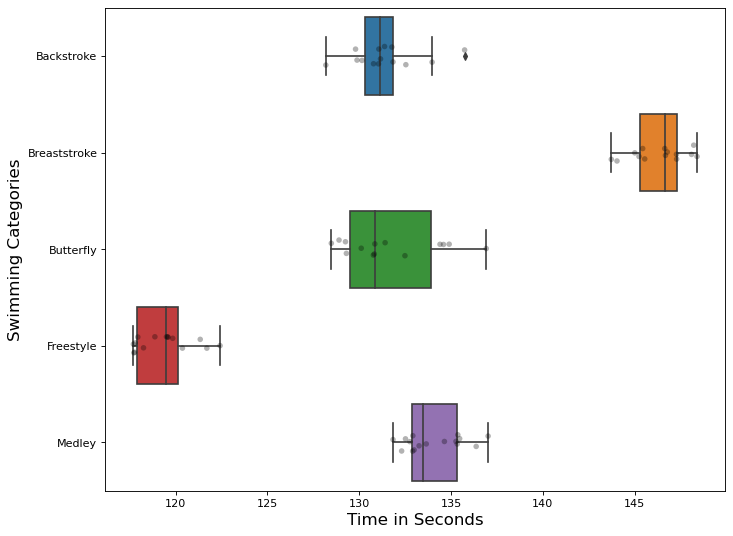

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate box-plot for swimming categories based on time
plt.figure(figsize=(10, 8), dpi=80)
sns.boxplot(y="Category", x="Time", data=data_unique)
sns.stripplot(y="Category", x="Time", color='black',alpha=0.3,data=data_unique)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Time in Seconds', fontsize=15)
plt.ylabel('Swimming Categories', fontsize=15)
plt.show()
plt.savefig('Plots/Boxplot_Swimming_Categories.pdf')

QQ Plots - Used to test assumptions for annova

#### Backstroke

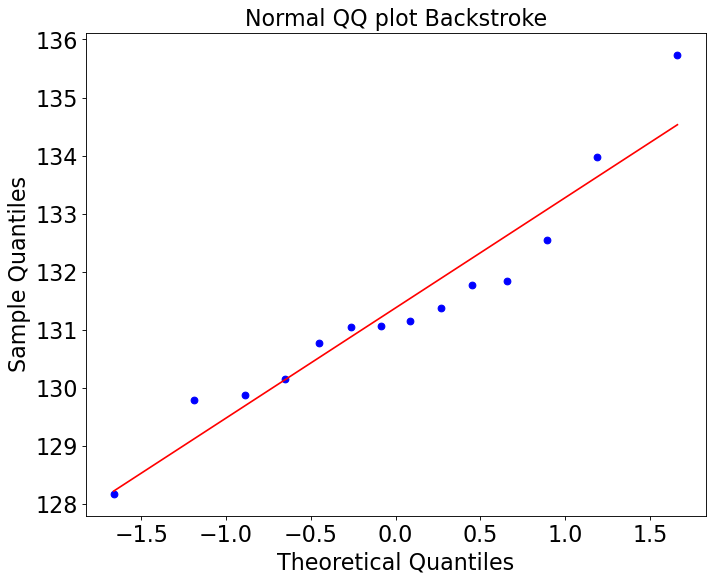

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 8), dpi=80)
stats.probplot(df_backstroke["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Backstroke", fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)
plt.show()
plt.savefig("Plots/QQ_Backstroke.pdf")

#### Breaststroke

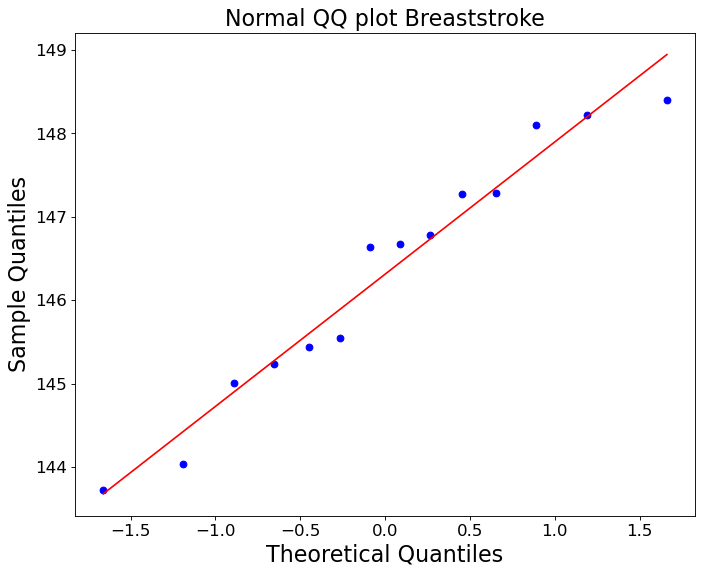

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(10, 8), dpi=80)
stats.probplot(df_breaststroke["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Breaststroke", fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)
plt.show()
plt.savefig("Plots/QQ_Breaststroke.pdf")

#### Butterfly

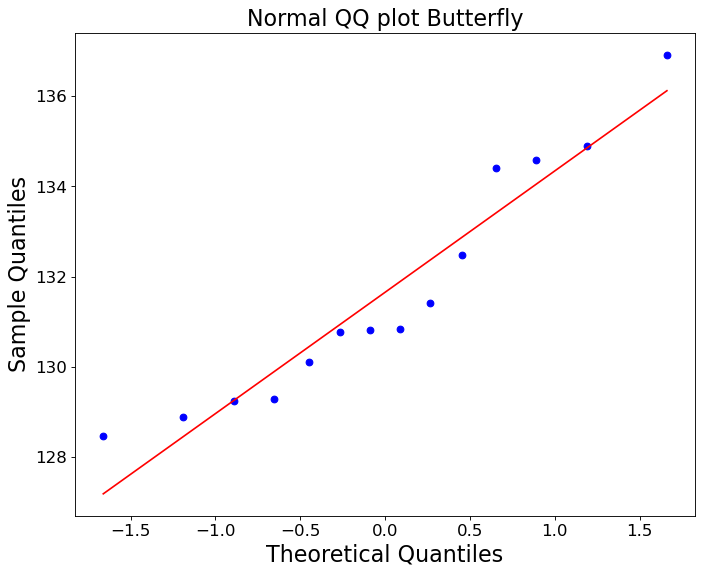

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 8), dpi=80)
stats.probplot(df_butterfly["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Butterfly", fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)
plt.show()
plt.savefig("Plots/QQ_Butterfly.pdf")

#### Freestyle

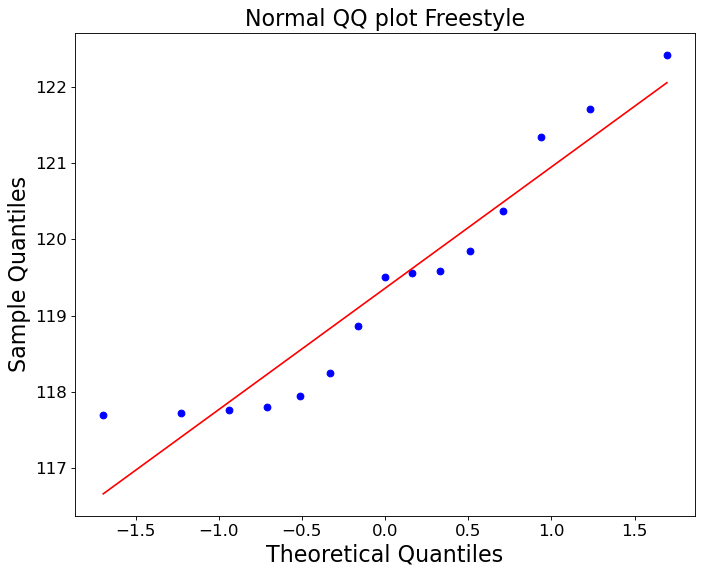

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(10, 8), dpi=80)
stats.probplot(df_freestyle["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Freestyle", fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)
plt.show()
plt.savefig("Plots/QQ_Freestyle.pdf")

#### Medley

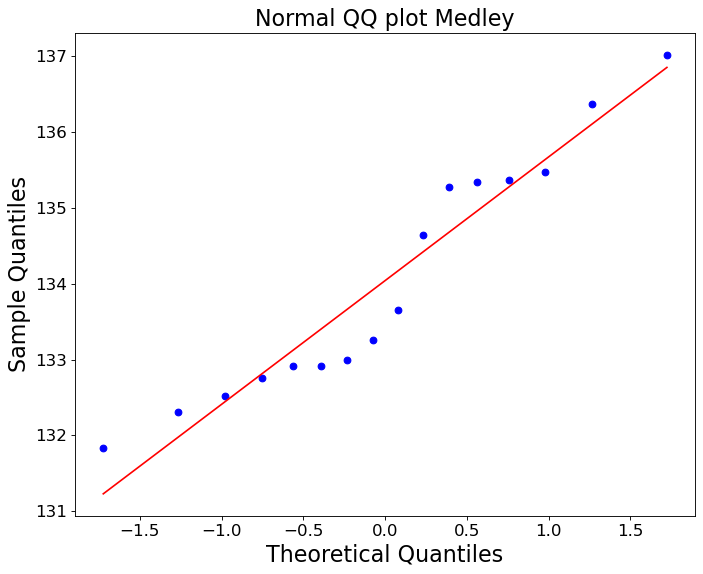

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 8), dpi=80)
stats.probplot(df_medley["Time"], dist="norm", plot = plt)
plt.title("Normal QQ plot Medley", fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)
plt.show()
plt.savefig("Plots/QQ_Medley.pdf")

Annova Test - Used to conduct a global test

In [19]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data_unique, res_var='Time', anova_model='Time ~ C(Category)')
res.anova_summary[["df","F","PR(>F)"]]

,df,F,PR(>F)
C(Category),4.0,385.922627,6.076029e-46
Residual,68.0,NaN,NaN


In [20]:
# converting result to use in latex report
print(res.anova_summary.round(2))
#print(res.anova_summary.round(2).to_latex())

               df   sum_sq  mean_sq       F  PR(>F)
C(Category)   4.0  5327.24  1331.81  385.92     0.0
Residual     68.0   234.67     3.45     NaN     NaN


Conducting Multiple Two Sample T-Test

In [21]:
# data_unique.groupby('Category').describe()

############################# 1 #################################
#res = stats.ttest_ind(df_backstroke["Time"], df_breaststroke["Time"], equal_var=True)
#res = stats.ttest_ind(df_backstroke["Time"], df_medley["Time"], equal_var=True)

#display(res)
############################ 2 #######################
# import pingouin as pg

# res = pg.ttest(df_backstroke["Time"], df_breaststroke["Time"], correction=False)
# display(res)

####################### 3 ###########################
# from statsmodels.stats.weightstats import ttest_ind

# ttest_ind(df_backstroke["Time"], df_breaststroke["Time"])

Multiple Two Sample T-Test and Bonferroni Correction

In [22]:
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(data_unique["Time"], data_unique["Category"])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf")
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
   group1       group2      stat    pval  pval_corr reject
----------------------------------------------------------
  Backstroke Breaststroke -23.4029    0.0       0.0   True
  Backstroke    Butterfly  -0.3231 0.7492       1.0  False
  Backstroke    Freestyle  18.9651    0.0       0.0   True
  Backstroke       Medley  -4.2368 0.0002    0.0022   True
Breaststroke    Butterfly  18.1855    0.0       0.0   True
Breaststroke    Freestyle  47.2693    0.0       0.0   True
Breaststroke       Medley  21.6131    0.0       0.0   True
   Butterfly    Freestyle  15.5252    0.0       0.0   True
   Butterfly       Medley  -3.0638 0.0048    0.0479   True
   Freestyle       Medley -25.9482    0.0       0.0   True
----------------------------------------------------------


Multiple Two Sample T-Test and Holm-Bonferroni Correction

In [23]:
comp2 = mc.MultiComparison(data_unique["Time"], data_unique["Category"])
tbl, a1, a2 = comp2.allpairtest(stats.ttest_ind, method= "holm")
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=holm
alphacSidak=0.01, alphacBonf=0.005
   group1       group2      stat    pval  pval_corr reject
----------------------------------------------------------
  Backstroke Breaststroke -23.4029    0.0       0.0   True
  Backstroke    Butterfly  -0.3231 0.7492    0.7492  False
  Backstroke    Freestyle  18.9651    0.0       0.0   True
  Backstroke       Medley  -4.2368 0.0002    0.0007   True
Breaststroke    Butterfly  18.1855    0.0       0.0   True
Breaststroke    Freestyle  47.2693    0.0       0.0   True
Breaststroke       Medley  21.6131    0.0       0.0   True
   Butterfly    Freestyle  15.5252    0.0       0.0   True
   Butterfly       Medley  -3.0638 0.0048    0.0096   True
   Freestyle       Medley -25.9482    0.0       0.0   True
----------------------------------------------------------
